# Regression Analysis: Exploration and data cleaning and wrangling

### This notebook is to exlore, understand and briefly visualise the original dataset to better understand the project and preapares the data for analzsis and later modelling through cleaning and wrangling.

#### Jump to:
  
<a href='#exploring'>Exploring the Dataset </a>
  
<a href='#cleaning'>Data Cleaning and Wrangling </a>

  
  

## Getting started

### Start off by importing source of data and libraries

In [259]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

### Import data from csv file

In [260]:
data = pd.read_csv("regression_data.csv")

In [261]:
#this file is here so the data is saved as a csv file which can be imported into Tableau
data.to_csv('regression_data_updated.csv')

### Making the data set usable by clarrifying the data clasification by labeling columns 

In [262]:
data.columns = ['id','date', 'bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
                'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renov', 'zip_code', 'lat', 
                'long', 'sqft_living15', 'sqft_lot15', 'price']
data.head(10)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renov,zip_code,lat,long,sqft_living15,sqft_lot15,price
0,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
1,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
2,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
3,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
4,7237550310,5/12/14,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
5,1321400060,6/27/14,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,257500
6,2008000270,1/15/15,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,291850
7,2414600126,4/15/15,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,229500
8,3793500160,3/12/15,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,323000
9,1736800520,4/3/15,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,662500


## <a id='exploring'>Exploring the Dataset </a>

In [263]:
#  data shape as a variable so we can compare it with cleanup 
dataShape = data.shape
dataShape

(21596, 21)

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21596 entries, 0 to 21595
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   bedrooms       21596 non-null  int64  
 3   bathrooms      21596 non-null  float64
 4   sqft_living    21596 non-null  int64  
 5   sqft_lot       21596 non-null  int64  
 6   floors         21596 non-null  float64
 7   waterfront     21596 non-null  int64  
 8   view           21596 non-null  int64  
 9   condition      21596 non-null  int64  
 10  grade          21596 non-null  int64  
 11  sqft_above     21596 non-null  int64  
 12  sqft_basement  21596 non-null  int64  
 13  yr_built       21596 non-null  int64  
 14  yr_renov       21596 non-null  int64  
 15  zip_code       21596 non-null  int64  
 16  lat            21596 non-null  float64
 17  long           21596 non-null  float64
 18  sqft_l

In [265]:
# Check if IDs are unique
data["id"].nunique

<bound method IndexOpsMixin.nunique of 0        6414100192
1        5631500400
2        2487200875
3        1954400510
4        7237550310
            ...    
21591     263000018
21592    6600060120
21593    1523300141
21594     291310100
21595    1523300157
Name: id, Length: 21596, dtype: int64>

In [266]:
data.isna().sum() #no NaN values

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renov         0
zip_code         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

### Exploring the values of individual columns

In [267]:
data['bedrooms'].value_counts()

3     9823
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [268]:
data['waterfront'].value_counts()

0    21433
1      163
Name: waterfront, dtype: int64

In [269]:
data['view'].value_counts()

0    19474
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [270]:
data['condition'].value_counts() # Condition 1 indicates poor and 5 excellent.

3    14019
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [271]:
data['grade'].value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [272]:
data['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [273]:
data['price'].head(10)

0     538000
1     180000
2     604000
3     510000
4    1230000
5     257500
6     291850
7     229500
8     323000
9     662500
Name: price, dtype: int64

### Using scatter plots to visualise the data to identify outlying data and patterns

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

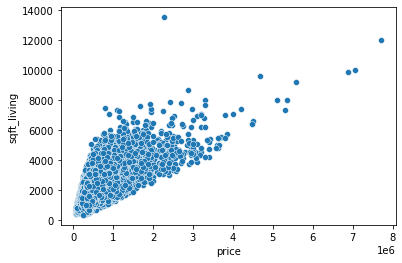

In [274]:
sns.scatterplot(data=data, x='price', y='sqft_living')

<AxesSubplot:xlabel='price', ylabel='bedrooms'>

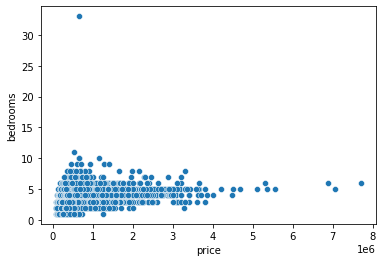

In [275]:
sns.scatterplot(data=data, x='price', y='bedrooms')

<AxesSubplot:xlabel='price', ylabel='sqft_lot'>

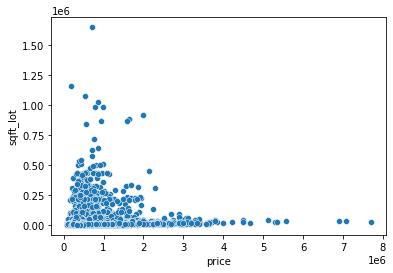

In [276]:
sns.scatterplot(data=data, x='price', y='sqft_lot')

<AxesSubplot:xlabel='price', ylabel='waterfront'>

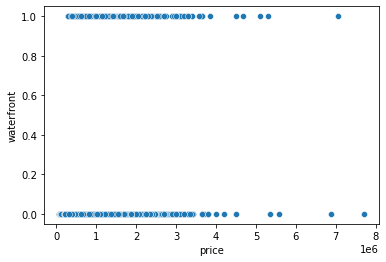

In [277]:
sns.scatterplot(data=data, x='price', y='waterfront')

<AxesSubplot:xlabel='price', ylabel='zip_code'>

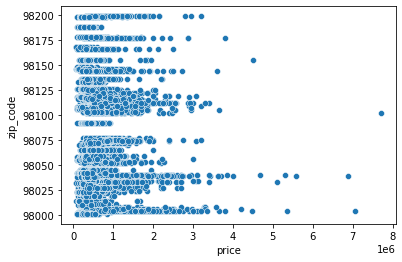

In [278]:
sns.scatterplot(data=data, x='price', y='zip_code')

<AxesSubplot:xlabel='price', ylabel='condition'>

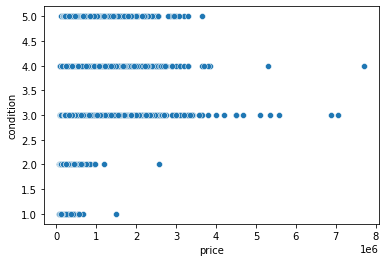

In [279]:
sns.scatterplot(data=data, x='price', y='condition')

## <a id='cleaning'>Data Cleaning and Wrangling </a>

## IDs must be unique to avoid data duplication

In [280]:
# Check for ID uniquness
data["id"].value_counts()

795000620     3
1825069031    2
7977201065    2
251300110     2
3969300030    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21419, dtype: int64

### Cleaning duplicated rows

In [281]:
data = data.drop_duplicates(['id'], keep='last')

### Validating the  ID Cleanup

In [282]:
# Check for ID uniquness
data["id"].value_counts()

2911700010    1
5450300010    1
5104511600    1
1160000115    1
686530110     1
             ..
2115510470    1
2922701305    1
6071600370    1
526059224     1
1777500160    1
Name: id, Length: 21419, dtype: int64

In [283]:
# Compare original data with new values
dataShapeClean1 = data.shape
print(dataShape, dataShapeClean1, sep="\n")

(21596, 21)
(21419, 21)


### Dealing with Outliers

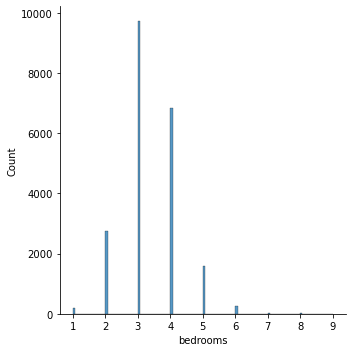

In [284]:
# The bedroom column has several outliers where properties have more than nine bedrooms. 
data = data[data['bedrooms']<=9]
sns.displot(data['bedrooms']) # Now it has a slightly better distribution.


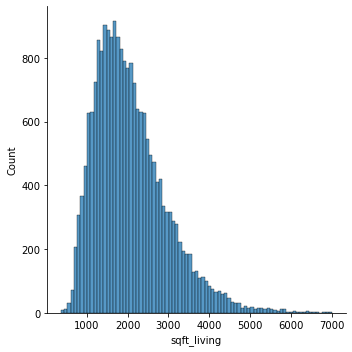

In [285]:
# The sqft_living column has several outliers where properties have more than 7000 sq ft of living space. 
data = data[data['sqft_living']<=7000]
sns.displot(data['sqft_living']) # Now it has a slightly better distribution.

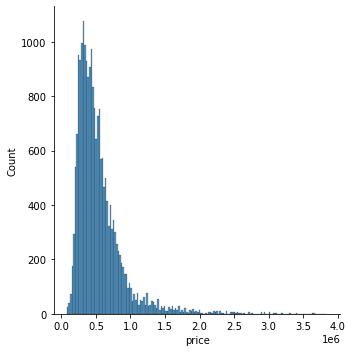

In [286]:
# The price column has several outliers where properties values are in excess of 4000000 dollars
data = data[data['price']<=4000000]
sns.displot(data['price']) # Now it has a slightly better distribution.

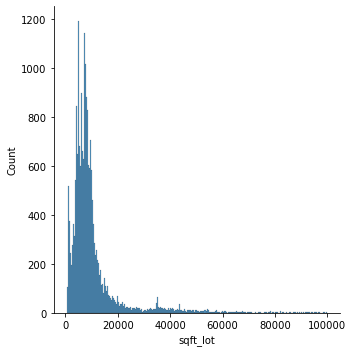

In [287]:
# The lot column has several outliers where lot size are in excess of 100000 sq ft
data = data[data['sqft_lot']<=100000]
sns.displot(data['sqft_lot']) # Now it has a slightly better distribution.

### Data explored, cleaned and wrangled!